In [2]:
# ==========================================
# 1️⃣ IMPORT LIBRARIES
# ==========================================

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


# ==========================================
# 2️⃣ LOAD DATASET
# ==========================================

df = pd.read_csv('/content/student_performance_advanced.csv')

print("Dataset Shape:", df.shape)


# ==========================================
# 3️⃣ DEFINE FEATURES
# ==========================================

X = df.drop(["final_exam_score", "pass_fail"], axis=1)

y_reg = df["final_exam_score"]
y_clf = df["pass_fail"]


# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


# ==========================================
# 4️⃣ PREPROCESSING PIPELINE
# ==========================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


# ==========================================
# 5️⃣ REGRESSION PIPELINE
# ==========================================

reg_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

reg_pipeline.fit(X_train_reg, y_train_reg)

pred_reg = reg_pipeline.predict(X_test_reg)

print("\n🔹 REGRESSION RESULTS")
print("R2 Score:", r2_score(y_test_reg, pred_reg))
print("MSE:", mean_squared_error(y_test_reg, pred_reg))


# ==========================================
# 6️⃣ CLASSIFICATION PIPELINE
# ==========================================

clf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

clf_pipeline.fit(X_train_clf, y_train_clf)

pred_clf = clf_pipeline.predict(X_test_clf)

print("\n🔹 CLASSIFICATION RESULTS")
print("Accuracy:", accuracy_score(y_test_clf, pred_clf))
print("\nClassification Report:\n")
print(classification_report(y_test_clf, pred_clf))


# ==========================================
# 7️⃣ SAVE MODELS (SMALL FILE SIZE)
# ==========================================

joblib.dump(reg_pipeline, "regression_model.pkl")
joblib.dump(clf_pipeline, "classification_model.pkl")

print("\n✅ Models saved successfully!")


Dataset Shape: (3000, 31)

🔹 REGRESSION RESULTS
R2 Score: 0.8824879994439284
MSE: 25.63227706222576

🔹 CLASSIFICATION RESULTS
Accuracy: 0.9283333333333333

Classification Report:

              precision    recall  f1-score   support

        Fail       0.76      0.61      0.68        74
        Pass       0.95      0.97      0.96       526

    accuracy                           0.93       600
   macro avg       0.85      0.79      0.82       600
weighted avg       0.92      0.93      0.92       600


✅ Models saved successfully!


Dataset Shape: (3000, 31)

LinearRegression R2 Score: 0.8824879994439284

RandomForest R2 Score: 0.8539819579197481

🔥 Best Regression Model: LinearRegression


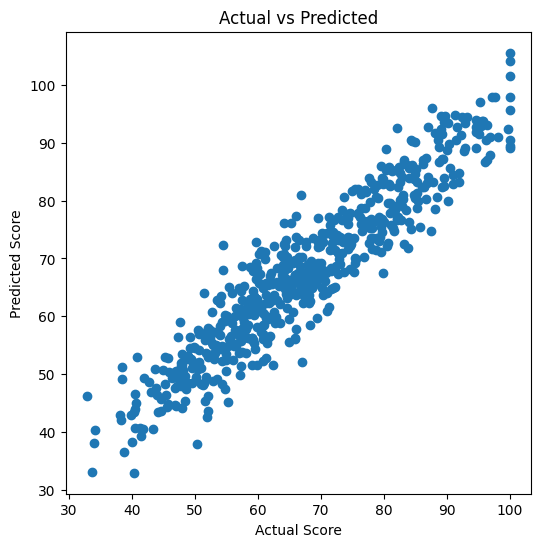


Generating SHAP values...


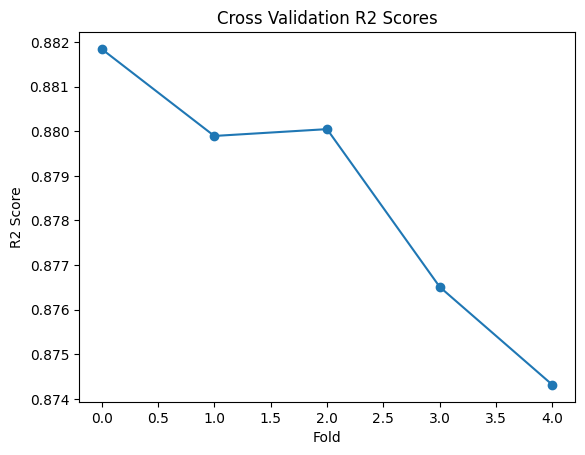

Average CV Score: 0.8785217304478289

Classification Accuracy: 0.9283333333333333

Classification Report:
               precision    recall  f1-score   support

        Fail       0.76      0.61      0.68        74
        Pass       0.95      0.97      0.96       526

    accuracy                           0.93       600
   macro avg       0.85      0.79      0.82       600
weighted avg       0.92      0.93      0.92       600



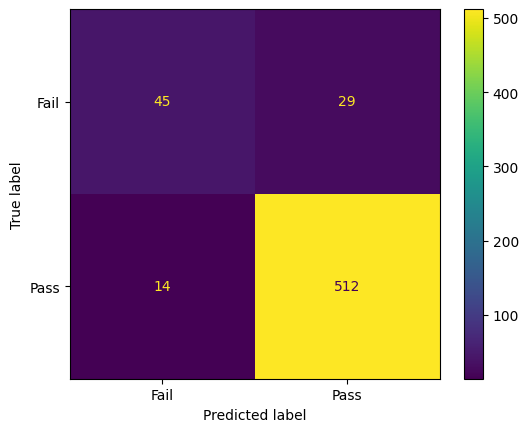

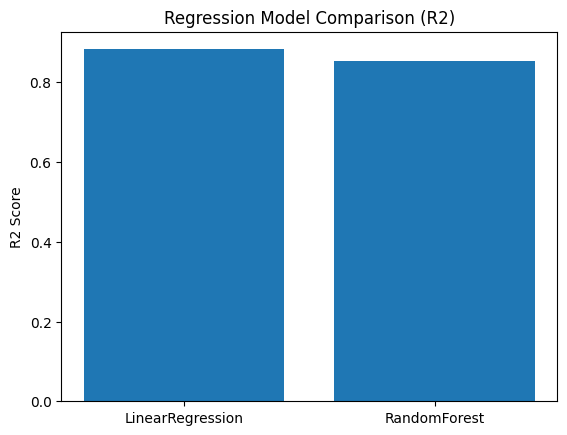


✅ Models Saved Successfully!


In [4]:
# ==========================================================
# 🔥 STUDENT RESULT PREDICTION – COMPLETE ML PIPELINE
# ==========================================================

%matplotlib inline

# ==========================================================
# 1️⃣ IMPORT LIBRARIES
# ==========================================================

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import shap

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

# ==========================================================
# 2️⃣ LOAD DATASET (NO CHANGE)
# ==========================================================

df = pd.read_csv('/content/student_performance_advanced.csv')

print("Dataset Shape:", df.shape)

X = df.drop(["final_exam_score", "pass_fail"], axis=1)
y_reg = df["final_exam_score"]
y_clf = df["pass_fail"]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# ==========================================================
# 3️⃣ PREPROCESSOR
# ==========================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# ==========================================================
# 4️⃣ REGRESSION MODELS
# ==========================================================

reg_models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

reg_results = {}

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

for name, model in reg_models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train_reg, y_train_reg)
    preds = pipeline.predict(X_test_reg)

    r2 = r2_score(y_test_reg, preds)
    reg_results[name] = r2

    print(f"\n{name} R2 Score:", r2)

best_reg_model_name = max(reg_results, key=reg_results.get)
print("\n🔥 Best Regression Model:", best_reg_model_name)

# Train best regression model
best_reg_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", reg_models[best_reg_model_name])
])
best_reg_pipeline.fit(X_train_reg, y_train_reg)

# ==========================================================
# 5️⃣ REGRESSION VISUALIZATION
# ==========================================================

pred_reg = best_reg_pipeline.predict(X_test_reg)

plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, pred_reg)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted")
plt.show()

# ==========================================================
# 6️⃣ FEATURE IMPORTANCE (if RandomForest)
# ==========================================================

if best_reg_model_name == "RandomForest":
    rf_model = best_reg_pipeline.named_steps["model"]

    feature_names = (
        list(numeric_features) +
        list(best_reg_pipeline.named_steps["preprocessing"]
             .named_transformers_["cat"]
             .get_feature_names_out(categorical_features))
    )

    importances = rf_model.feature_importances_

    indices = np.argsort(importances)[-15:]

    plt.figure(figsize=(8,6))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.show()

# ==========================================================
# 7️⃣ SHAP EXPLAINABILITY
# ==========================================================

print("\nGenerating SHAP values...")

if best_reg_model_name == "RandomForest":
    explainer = shap.TreeExplainer(rf_model)

    X_processed = best_reg_pipeline.named_steps["preprocessing"].transform(X_test_reg)
    shap_values = explainer.shap_values(X_processed)

    shap.summary_plot(shap_values, X_processed, show=True)

# ==========================================================
# 8️⃣ CROSS VALIDATION GRAPH
# ==========================================================

cv_scores = cross_val_score(
    best_reg_pipeline,
    X,
    y_reg,
    cv=5,
    scoring="r2"
)

plt.figure()
plt.plot(cv_scores, marker='o')
plt.title("Cross Validation R2 Scores")
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.show()

print("Average CV Score:", np.mean(cv_scores))

# ==========================================================
# 9️⃣ CLASSIFICATION
# ==========================================================

clf_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

clf_pipeline.fit(X_train_clf, y_train_clf)
pred_clf = clf_pipeline.predict(X_test_clf)

print("\nClassification Accuracy:",
      accuracy_score(y_test_clf, pred_clf))

print("\nClassification Report:\n",
      classification_report(y_test_clf, pred_clf))

ConfusionMatrixDisplay.from_estimator(
    clf_pipeline,
    X_test_clf,
    y_test_clf
)
plt.show()

# ==========================================================
# 🔟 MODEL COMPARISON GRAPH
# ==========================================================

plt.figure()
plt.bar(reg_results.keys(), reg_results.values())
plt.title("Regression Model Comparison (R2)")
plt.ylabel("R2 Score")
plt.show()

# ==========================================================
# 1️⃣1️⃣ SAVE MODELS (SMALL SIZE)
# ==========================================================

joblib.dump(best_reg_pipeline, "regression_model.pkl")
joblib.dump(clf_pipeline, "classification_model.pkl")

print("\n✅ Models Saved Successfully!")
